## Project 1 (Due 2/17)

The goal of the first project is to do some wrangling, EDA, and visualization, and generate sequences of values. We will focus on:

- CDC National Health and Nutritional Examination Survey (NHANES, 1999-2000): https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=1999
- CDC Linked Mortality File (LMF, 1999-2000): https://www.cdc.gov/nchs/data-linkage/mortality-public.htm

NHANES is a rich panel dataset on health and behavior, collected bi-yearly from around 1999 to now. We will focus on the 1999 wave, because that has the largest follow-up window, providing us with the richest mortality data. The mortality data is provided by the CDC Linked Mortality File. 

The purpose of the project is to use $k$-NN to predict who dies (hard or soft classification) and how long they live (regression).

### Day 1: Wrangling and EDA (40/100 pts)

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as `lmf_parsed.cav`. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

Second, download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

``` python
import pandas as pd
mdf = pd.read_csv('lmf_parsed.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable
```

Third, the variables `ELIGSTAT`, `MORTSTAT`, `PERMTH_INT`, and `RIDAGEEX` are particularly important. Look them up in the documentation and clearly describe them. (5/100 pts.)

Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (`MORTSTAT`) and life expectancy (`PERMTH_INT`). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use `.merge` to combine your data into one complete dataframe. Document missing values. (5/100 pts)

Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using. (20/100 pts)

In [113]:
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') 
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") 
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") 

   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

**Exploring variables ELIGSTAT, MORTSTAT, PERMTH_INT, RIDAGEEX**

ELIGSTAT:
- 'Eligibility Status for Mortality Follow-up'
- Possible values are:
  - 1 = "Eligible"
  - 2 = "Under age 18, not available for public release"
  - 3 = "Ineligible"
- Variable type = Num
- Information:
  - Survey participants are defined as ineligible for mortality linkage if they had insufficient identifying data
  - All survey participants from the survey files are included on the linked mortality files regardless of linkage eligibility

MORTSTAT:
- 'Final Mortality Status'
- Possible values are:
  - 0 = "Assumed Alive"
  - 1 = "Assumed deceased"
  - . = "Ineligible or under age 18"
- Variable type = Num
- Information:
  - The MORTSTAT variable is the final determination of vital status and should be used as an outcome variable to calculate survival
  - Each survey participant who is eligible for mortality follow-up is assigned a vital status code (0=Assumed alive, 1=Assumed deceased) 

PERMTH_INT
- 'Number of Person Months of Follow-up from NHANES interview date'
- Range of Values:
  - 0-374 = Months
  - . = Ineligible, under age 18, or assumed alive
- Variable type = Num
- Information:
  - Number of person-months of follow-up from NHANES interview date
  - Participants who are assumed alive are assigned the number of person months at the end of the mortality period, December 31, 2019
  - Only applicable for NHANES III and continuous NHANES (1999-2018) 

RIDAGEEX:
- 'Exam Age in Months - Recode'
- Best age in months at date of examination for individuals under 85 years of age at screening
- Both males and females 0 YEARS - 84 YEARS
- Range of values:
  - 0 to 1019 = Months
  - . = Missing
- Variable Type = Num
- Information:
  - Age in months at MEC examination, provided only for those who were less than 85 years of age (RIDAGEYR < 85) at the time of the household screening interview
  - RIDAGEEX was not calculated for individuals with an imputed age

In [114]:
food = pd.read_sas("DRXTOT.xpt", format="xport") 
print(food.head())
X = df.merge(food, on="SEQN", how="left") 
X.head()

   SEQN         WTDRD1       WTDR4YR  DRDDRSTS  DRDEXMER  DRASCST2  DRDAINMD  \
0   1.0   14809.893854   6066.128663       1.0      19.0       1.0       1.0   
1   2.0   26899.708892  14921.934292       1.0      72.0       1.0       1.0   
2   3.0   34388.840334  15866.447640       1.0      70.0       1.0       1.0   
3   4.0    7159.829389   3218.099911       1.0      72.0       1.0       1.0   
4   5.0  127746.359176  58973.611131       1.0      65.0       1.0       1.0   

   DRDINTMD  DRDDAY  DRALANG  ...  DRQ370QQ  DRD370R  DRQ370RQ  DRD370S  \
0       1.0     4.0      1.0  ...       NaN      2.0       NaN      2.0   
1       1.0     6.0      1.0  ...       NaN      2.0       NaN      2.0   
2       1.0     7.0      2.0  ...       NaN      NaN       NaN      NaN   
3       1.0     6.0      1.0  ...       NaN      2.0       NaN      2.0   
4       1.0     2.0      1.0  ...       NaN      NaN       NaN      NaN   

   DRQ370SQ  DRD370T  DRQ370TQ  DRD370U  DRQ370UQ  DRD370V  
0      

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,DRQ370QQ,DRD370R,DRQ370RQ,DRD370S,DRQ370SQ,DRD370T,DRQ370TQ,DRD370U,DRQ370UQ,DRD370V
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We selected this data because we were curious about how total nutrient intake impacts mortality. If we are able to find clear patterns between nutrients and mortality, we will be able to know which food groups to steer clear of and what nutrients we should focus on getting/not getting.

In [115]:
print(X.isna().any())
missing = X.isna().sum().to_frame()
missing

SEQN        False
SDDSRVYR    False
RIDSTATR    False
RIDEXMON     True
RIAGENDR    False
            ...  
DRD370T      True
DRQ370TQ     True
DRD370U      True
DRQ370UQ     True
DRD370V      True
Length: 283, dtype: bool


,0
SEQN,0
SDDSRVYR,0
RIDSTATR,0
RIDEXMON,683
RIAGENDR,0
...,...
DRD370T,4885
DRQ370TQ,9126
DRD370U,4885
DRQ370UQ,9591


As shown by the table above, there are many missing values in our Data Frame. 

These missing values are very prevalent in our third dataset, the one with nutrition data, so we will drop columns with all na vales.

In [116]:
empty_cols = X.columns[X.isna().all()]
empty_cols

Index([], dtype='object')

In [117]:
X.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIDEXMON',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDAGEEX',
 'RIDRETH1',
 'RIDRETH2',
 'DMQMILIT',
 'DMDBORN',
 'DMDCITZN',
 'DMDYRSUS',
 'DMDEDUC3',
 'DMDEDUC2',
 'DMDEDUC',
 'DMDSCHOL',
 'DMDMARTL',
 'DMDHHSIZ',
 'INDHHINC',
 'INDFMINC',
 'INDFMPIR',
 'RIDEXPRG',
 'RIDPREG',
 'DMDHRGND',
 'DMDHRAGE',
 'DMDHRBRN',
 'DMDHREDU',
 'DMDHRMAR',
 'DMDHSEDU',
 'WTINT2YR',
 'WTINT4YR',
 'WTMEC2YR',
 'WTMEC4YR',
 'SDMVPSU',
 'SDMVSTRA',
 'SDJ1REPN',
 'DMAETHN',
 'DMARACE',
 'WTMREP01',
 'WTMREP02',
 'WTMREP03',
 'WTMREP04',
 'WTMREP05',
 'WTMREP06',
 'WTMREP07',
 'WTMREP08',
 'WTMREP09',
 'WTMREP10',
 'WTMREP11',
 'WTMREP12',
 'WTMREP13',
 'WTMREP14',
 'WTMREP15',
 'WTMREP16',
 'WTMREP17',
 'WTMREP18',
 'WTMREP19',
 'WTMREP20',
 'WTMREP21',
 'WTMREP22',
 'WTMREP23',
 'WTMREP24',
 'WTMREP25',
 'WTMREP26',
 'WTMREP27',
 'WTMREP28',
 'WTMREP29',
 'WTMREP30',
 'WTMREP31',
 'WTMREP32',
 'WTMREP33',
 'WTMREP34',
 'WTMREP35',
 'WTMREP36',
 'WTMREP37',
 'WTMREP3

In [118]:
X = X.dropna(axis=1, how="all")
X.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,DRQ370QQ,DRD370R,DRQ370RQ,DRD370S,DRQ370SQ,DRD370T,DRQ370TQ,DRD370U,DRQ370UQ,DRD370V
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have now dropped 2 columns: DMAETHN and DMARACE

We can also hone in on a few variables of interest, which we have selected below. 

DRXIKCAL:
- Energy (kcal)
- Range: (0-9656.67)
- 557 missing values

DRXIPROT:
- Protein (gm)
- Range: (0-461.02)
- 557 missing values

DRXICARB:
- Carbohydrate (gm)
- Range: (0-1513.96)
- 557 missing values

DRXITFAT:
- Total fat (gm)
- Range: (0-428.23)
- 557 missing values

In [119]:
X_interesting = X.loc[:,['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT'] ]
X_interesting.head()

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
0,2,NaN,NaN,31.0,1358.88,31.96,250.36,27.24
1,1,1.0,177.0,926.0,2463.00,123.16,350.37,71.95
2,2,NaN,NaN,126.0,1517.69,40.19,233.63,49.94
3,2,NaN,NaN,23.0,1474.93,56.16,191.03,56.20
4,1,0.0,244.0,597.0,2658.14,97.13,253.98,114.52


### **EDA**:

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<function matplotlib.pyplot.show(close=None, block=None)>

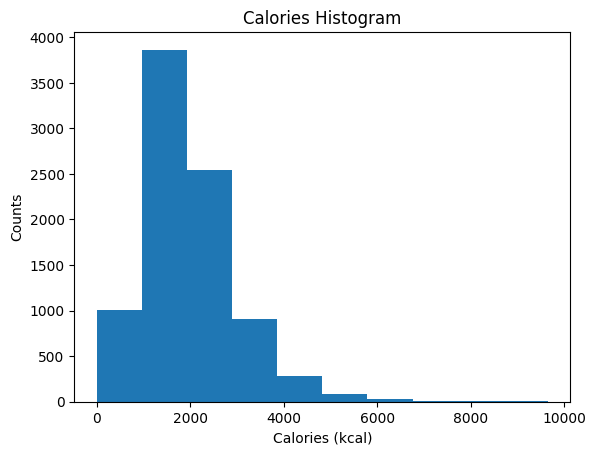

In [121]:
plt.hist(X_interesting['DRXTKCAL'])
plt.title("Calories Histogram")
plt.xlabel("Calories (kcal)")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

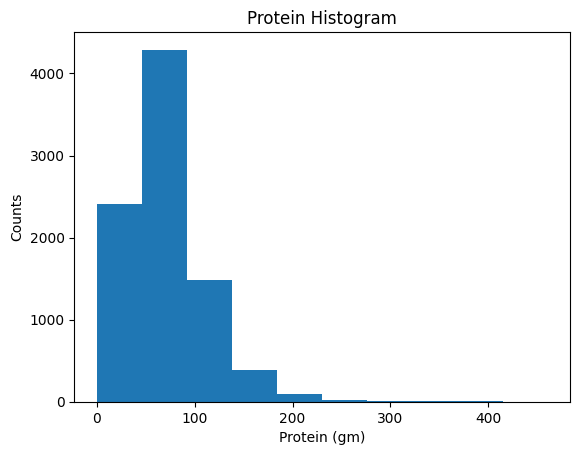

In [122]:
plt.hist(X_interesting['DRXTPROT'])
plt.title("Protein Histogram")
plt.xlabel("Protein (gm)")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

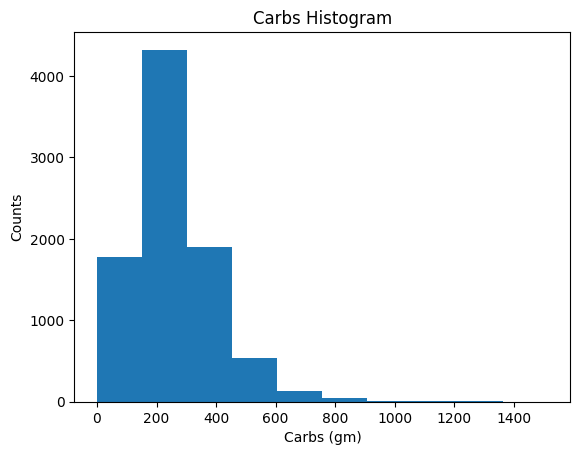

In [123]:
plt.hist(X_interesting['DRXTCARB'])
plt.title("Carbs Histogram")
plt.xlabel("Carbs (gm)")
plt.ylabel("Counts")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

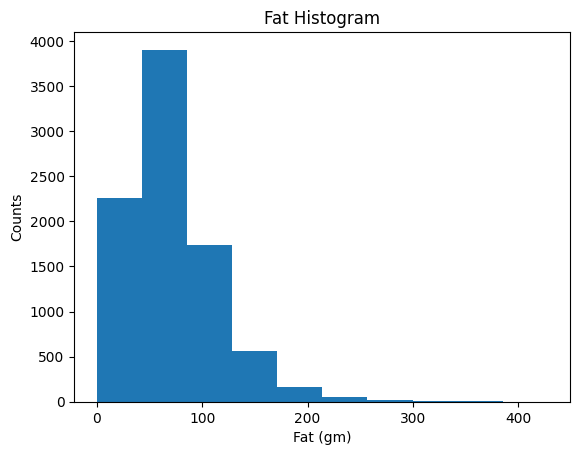

In [124]:
plt.hist(X_interesting['DRXTTFAT'])
plt.title("Fat Histogram")
plt.xlabel("Fat (gm)")
plt.ylabel("Counts")
plt.show

All of the histograms appear to be right-skewed

In [125]:
X_interesting['DRXTKCAL'].describe()	

count    8.725000e+03
mean     1.975533e+03
std      9.900975e+02
min      5.397605e-79
25%      1.304850e+03
50%      1.797800e+03
75%      2.440150e+03
max      9.656670e+03
Name: DRXTKCAL, dtype: float64

In [126]:
X_interesting['DRXTPROT'].describe()

count    8.725000e+03
mean     7.115863e+01
std      4.062756e+01
min      5.397605e-79
25%      4.402000e+01
50%      6.389000e+01
75%      8.938000e+01
max      4.610200e+02
Name: DRXTPROT, dtype: float64

In [127]:
X_interesting['DRXTCARB'].describe()

count    8.725000e+03
mean     2.586785e+02
std      1.362553e+02
min      5.397605e-79
25%      1.653400e+02
50%      2.351400e+02
75%      3.237300e+02
max      1.513960e+03
Name: DRXTCARB, dtype: float64

In [128]:
X_interesting['DRXTTFAT'].describe()

count    8.725000e+03
mean     7.201394e+01
std      4.284108e+01
min      5.397605e-79
25%      4.195000e+01
50%      6.363000e+01
75%      9.188000e+01
max      4.282300e+02
Name: DRXTTFAT, dtype: float64

In [129]:
var_list = 'ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT'
X_interesting.loc[:, var_list].corr(numeric_only=True)

,ELIGSTAT,MORTSTAT,PERMTH_INT,RIDAGEEX,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT
ELIGSTAT,1.000000,NaN,NaN,-0.777590,-0.113181,-0.188492,-0.043750,-0.083597
MORTSTAT,NaN,1.000000,-0.823795,0.633499,-0.196089,-0.142729,-0.195624,-0.151387
PERMTH_INT,NaN,-0.823795,1.000000,-0.558842,0.172962,0.130214,0.170801,0.131422
RIDAGEEX,-0.777590,0.633499,-0.558842,1.000000,0.009288,0.105413,-0.046113,0.008153
DRXTKCAL,-0.113181,-0.196089,0.172962,0.009288,1.000000,0.807435,0.897563,0.872111
DRXTPROT,-0.188492,-0.142729,0.130214,0.105413,0.807435,1.000000,0.600659,0.765020
DRXTCARB,-0.043750,-0.195624,0.170801,-0.046113,0.897563,0.600659,1.000000,0.641143
DRXTTFAT,-0.083597,-0.151387,0.131422,0.008153,0.872111,0.765020,0.641143,1.000000


ELIGSTAT number of outliers: 0
MORTSTAT number of outliers: 0
PERMTH_INT number of outliers: 883
RIDAGEEX number of outliers: 0
DRXTKCAL number of outliers: 285
DRXTPROT number of outliers: 318
DRXTCARB number of outliers: 279
DRXTTFAT number of outliers: 291


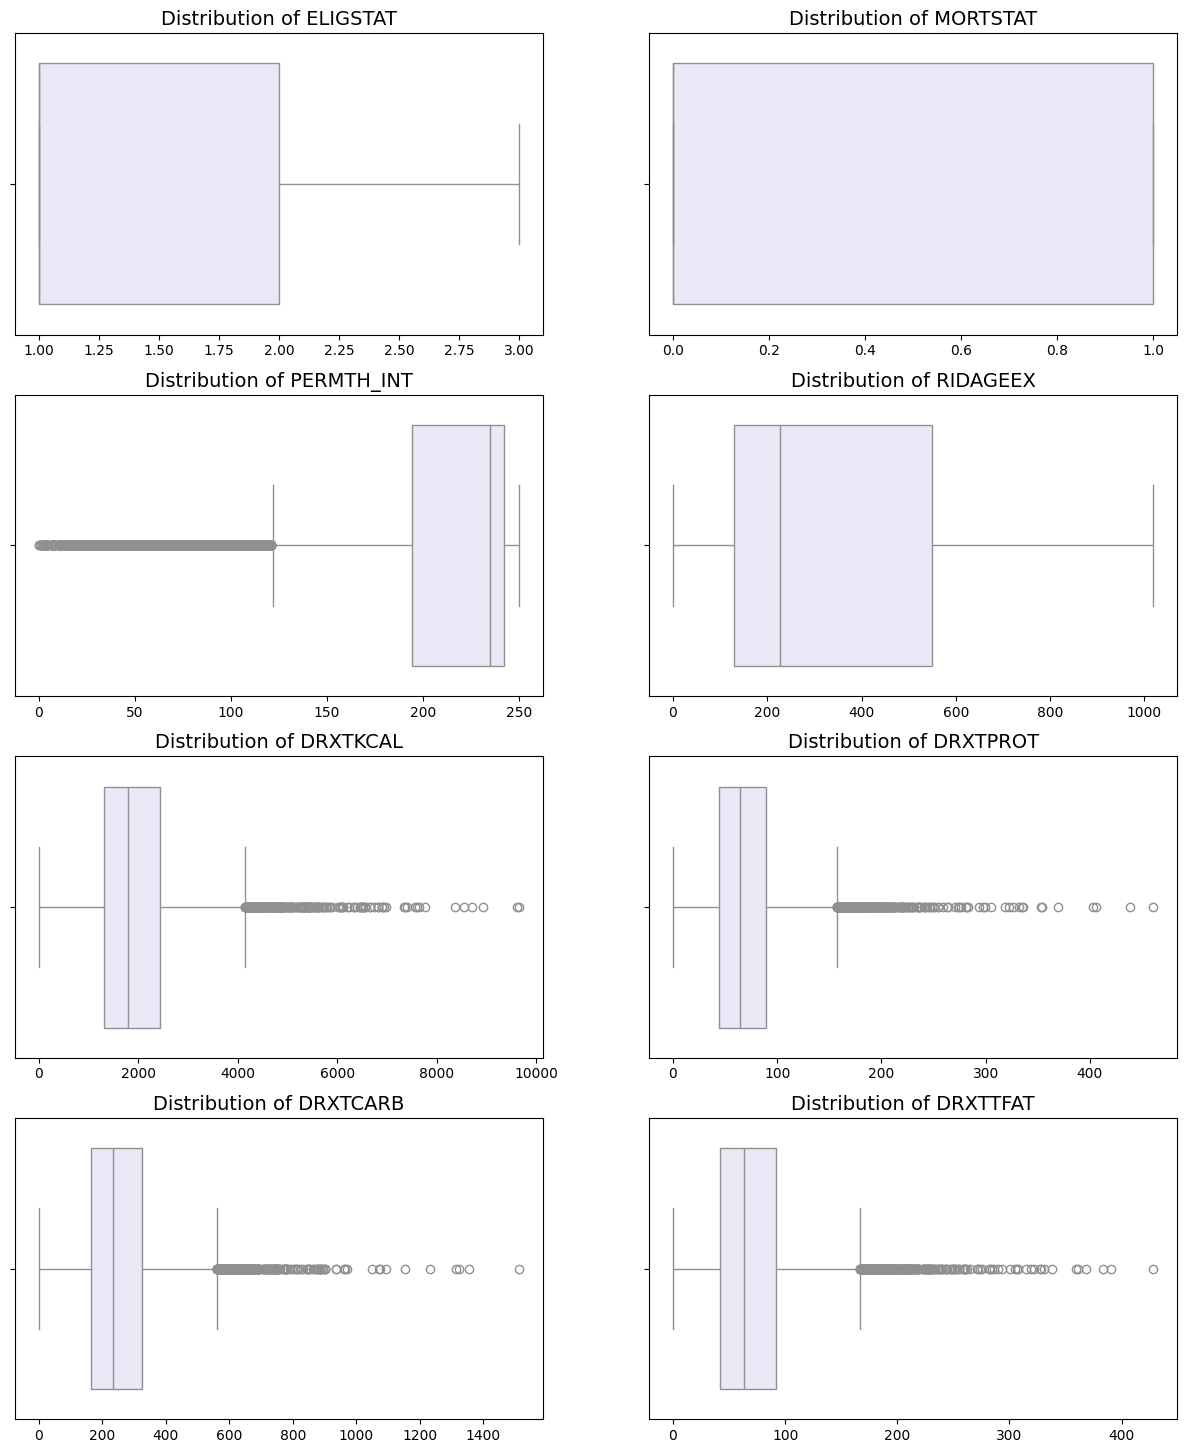

In [130]:
columns = ['ELIGSTAT', 'MORTSTAT', 'PERMTH_INT', 'RIDAGEEX', 'DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT']
fig, axes = plt.subplots(4, 2, figsize=(15, 18))
axes = axes.flatten()

for i, column in enumerate(columns):    
    sns.boxplot(
        x=X_interesting[column], 
        ax=axes[i], 
        color='lavender')
    axes[i].set_title(f"Distribution of {column}", fontsize=14)
    axes[i].set_xlabel("")

    Q1 = X_interesting[column].quantile(0.25)
    Q3 = X_interesting[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X_interesting[(X_interesting[column] < lower_bound) | (X_interesting[column] > upper_bound)]
    count = outliers.shape[0]
    
    print(f"{column} number of outliers: {count}")

plt.show()


In [131]:
print("MORTSTAT does not appear to be skewed.\nELIGSTAT, RIDAGEX, DRXTKCAL, DRXTPROT, DRXTCARB, and DRXTTFAT are right skewed. \nPERMTH_INT is left skewed.")

MORTSTAT does not appear to be skewed.
ELIGSTAT, RIDAGEX, DRXTKCAL, DRXTPROT, DRXTCARB, and DRXTTFAT are right skewed. 
PERMTH_INT is left skewed.


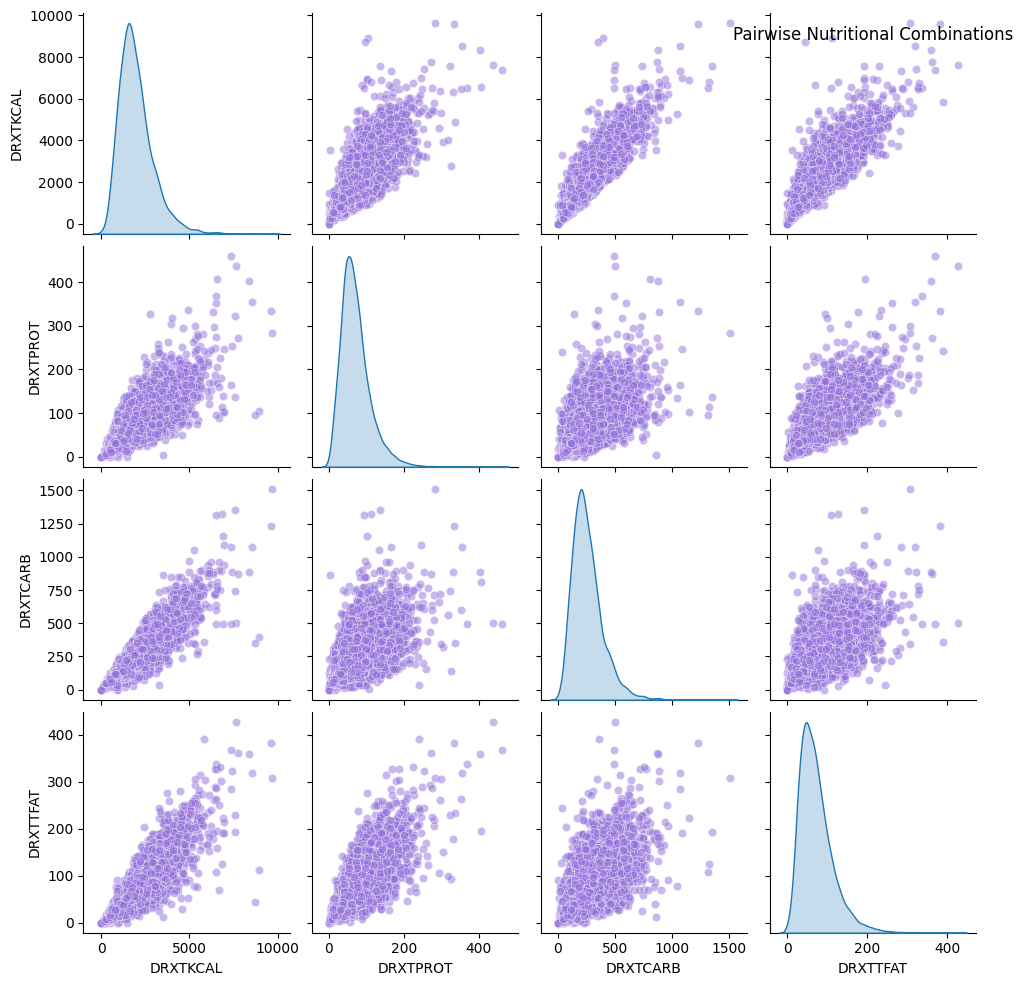

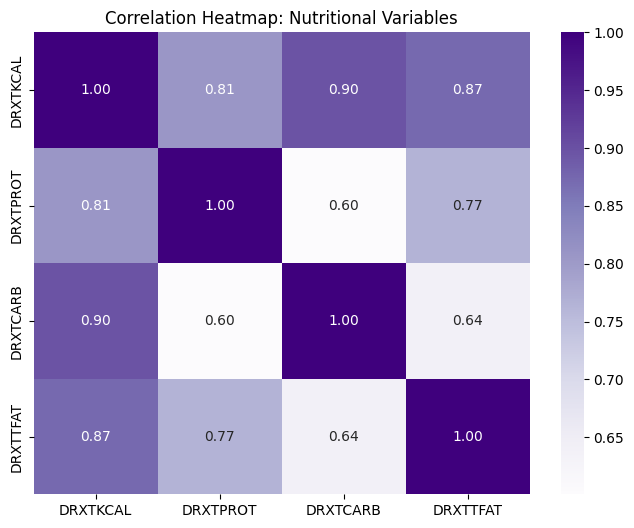

In [132]:
axes = axes.flatten()
columns2 = ['DRXTKCAL','DRXTPROT', 'DRXTCARB', 'DRXTTFAT']

pair_plot = sns.pairplot(X_interesting[columns2], diag_kind='kde', plot_kws={'alpha': 0.5, 'color': 'mediumpurple'})

plt.title("Pairwise Nutritional Combinations", y = 4)
plt.show()

correlation_matrix = X_interesting[columns2].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title("Correlation Heatmap: Nutritional Variables")
plt.show()

DRXTKCAL and DRXTCARB appear to have the highest correlation (0.90), followed by  DRXTKCAL and DRXTTFAT (0.87). 

DRXTPROT and DRXTCARB are the least correlated with a correlation of 0.60. The second least correlated are DRXTTFAT and DRXTCARB with a correlation of 0.64. 

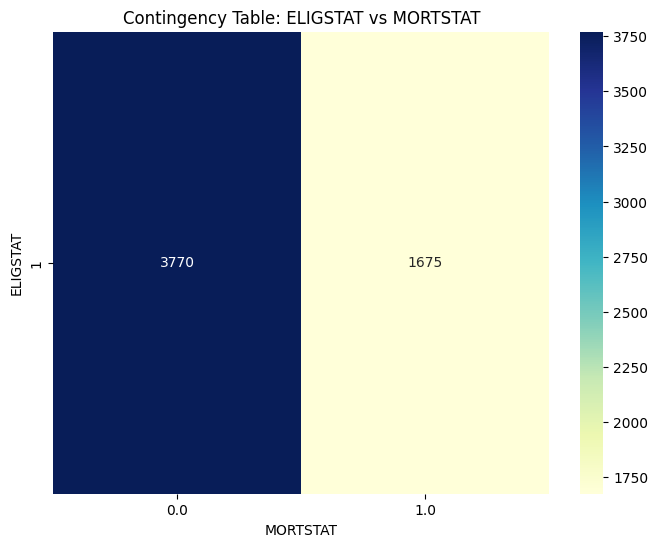

In [133]:
#Contingency Table
ct = pd.crosstab(X_interesting['ELIGSTAT'], X_interesting['MORTSTAT'])
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: ELIGSTAT vs MORTSTAT')
plt.show()

The contingency table shows that categorical variable ELIGSTAT is only 1 when there is a MORTSTAT value. This is because when ELIGSTAT = 2, there is no MORTSTAT value, because this means the patient is under 18, so we cannot get their MORTSTAT value. Similarly, if ELIGSTAT = 3, the patient is ineligible, so we won't have a MORTSTAT value for them. Finally, MORTSTAT = 0 over 2x the amount of time MORTSTAT = 1. This means there over twice the amount of people alive than deceased.  